Exploring the hourlyIntensities_merged Dataset of our Project

In [4]:
import pandas as pd

filePath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/hourlyIntensities_merged.csv'
dfHourlyIntensity = pd.read_csv(filePath)
# displaying the first few rows of our datset.
print(dfHourlyIntensity.head())

           Id           ActivityHour  TotalIntensity  AverageIntensity
0  1503960366  4/12/2016 12:00:00 AM              20          0.333333
1  1503960366   4/12/2016 1:00:00 AM               8          0.133333
2  1503960366   4/12/2016 2:00:00 AM               7          0.116667
3  1503960366   4/12/2016 3:00:00 AM               0          0.000000
4  1503960366   4/12/2016 4:00:00 AM               0          0.000000


In [5]:
# Displaying the basic information about the dataset
print(dfHourlyIntensity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB
None


In [6]:
# Displaying the summary statistics of numeric columns
print(dfHourlyIntensity.describe())

                 Id  TotalIntensity  AverageIntensity
count  2.209900e+04    22099.000000      22099.000000
mean   4.848235e+09       12.035341          0.200589
std    2.422500e+09       21.133110          0.352219
min    1.503960e+09        0.000000          0.000000
25%    2.320127e+09        0.000000          0.000000
50%    4.445115e+09        3.000000          0.050000
75%    6.962181e+09       16.000000          0.266667
max    8.877689e+09      180.000000          3.000000


In [7]:
# Displaying the names of all columns
print(dfHourlyIntensity.columns)

Index(['Id', 'ActivityHour', 'TotalIntensity', 'AverageIntensity'], dtype='object')


Data Preprocessing

In [8]:
# Checking for missing values in each column
print(dfHourlyIntensity.isnull().sum())

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64


In [9]:
# Explore unique values in a specific columns
print(dfHourlyIntensity['Id'].unique())
print(dfHourlyIntensity['ActivityHour'].unique())
print(dfHourlyIntensity['TotalIntensity'].unique())
print(dfHourlyIntensity['AverageIntensity'].unique())

[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 8877689391]
['4/12/2016 12:00:00 AM' '4/12/2016 1:00:00 AM' '4/12/2016 2:00:00 AM'
 '4/12/2016 3:00:00 AM' '4/12/2016 4:00:00 AM' '4/12/2016 5:00:00 AM'
 '4/12/2016 6:00:00 AM' '4/12/2016 7:00:00 AM' '4/12/2016 8:00:00 AM'
 '4/12/2016 9:00:00 AM' '4/12/2016 10:00:00 AM' '4/12/2016 11:00:00 AM'
 '4/12/2016 12:00:00 PM' '4/12/2016 1:00:00 PM' '4/12/2016 2:00:00 PM'
 '4/12/2016 3:00:00 PM' '4/12/2016 4:00:00 PM' '4/12/2016 5:00:00 PM'
 '4/12/2016 6:00:00 PM' '4/12/2016 7:00:00 PM' '4/12/2016 8:00:00 PM'
 '4/12/2016 9:00:00 PM' '4/12/2016 10:00:00 PM' '4/12/2016 11:00:00 PM'
 '4/13/2016 12:00:00 AM' '4/13/2016 1:00:00 AM' '4/13/2016 2:00:

In [10]:
# Checking for duplicate rows
duplicates = dfHourlyIntensity.duplicated()
print("Number of Duplicate Rows:", duplicates.sum())

duplicate_rows = dfHourlyIntensity[duplicates]
print("\nAs No Duplicate Rows:")
print(duplicate_rows)

# Removing the Duplicate Rows
dfHourlyIntensity = dfHourlyIntensity.drop_duplicates()

# Verifying afterwards
print("\nNo Existing Duplicates:")
print("Total Number of Rows:", len(dfHourlyIntensity))

Number of Duplicate Rows: 0

As No Duplicate Rows:
Empty DataFrame
Columns: [Id, ActivityHour, TotalIntensity, AverageIntensity]
Index: []

No Existing Duplicates:
Total Number of Rows: 22099


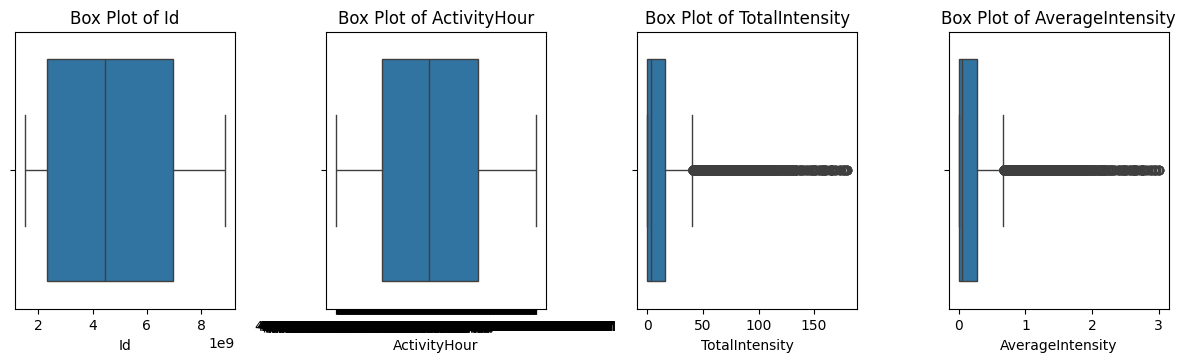

In [11]:
# Visualizing the features to identify the outliers.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, column in enumerate(dfHourlyIntensity.columns):
    plt.subplot(3, 5, i+1)  
    sns.boxplot(x=dfHourlyIntensity[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Handling the Outliers Separately on Features

1. TotalIntensity

In [17]:
# We are applying capping
TotalIntensityUpperLimit = 30

dfHourlyIntensity['TotalIntensity'] = dfHourlyIntensity['TotalIntensity'].clip(upper=TotalIntensityUpperLimit)
print("Capped TotalIntensity:")
print(dfHourlyIntensity['TotalIntensity'].describe())

Capped TotalIntensity:
count    22099.000000
mean         8.879497
std         10.869365
min          0.000000
25%          0.000000
50%          3.000000
75%         16.000000
max         30.000000
Name: TotalIntensity, dtype: float64


2. AverageIntensity

In [21]:
AverageIntensityUpperLimit = 0.6

# Applying capping for TotalDistance
dfHourlyIntensity['AverageIntensity'] = dfHourlyIntensity['AverageIntensity'].clip(upper=AverageIntensityUpperLimit)
print("Capped AverageIntensity:")
print(dfHourlyIntensity['AverageIntensity'].describe())

Capped AverageIntensity:
count    22099.000000
mean         0.157642
std          0.201073
min          0.000000
25%          0.000000
50%          0.050000
75%          0.266667
max          0.600000
Name: AverageIntensity, dtype: float64


In [22]:
# Displaying summary statistics of all columns
print(dfHourlyIntensity.describe())


                 Id  TotalIntensity  AverageIntensity
count  2.209900e+04    22099.000000      22099.000000
mean   4.848235e+09        8.879497          0.157642
std    2.422500e+09       10.869365          0.201073
min    1.503960e+09        0.000000          0.000000
25%    2.320127e+09        0.000000          0.000000
50%    4.445115e+09        3.000000          0.050000
75%    6.962181e+09       16.000000          0.266667
max    8.877689e+09       30.000000          0.600000


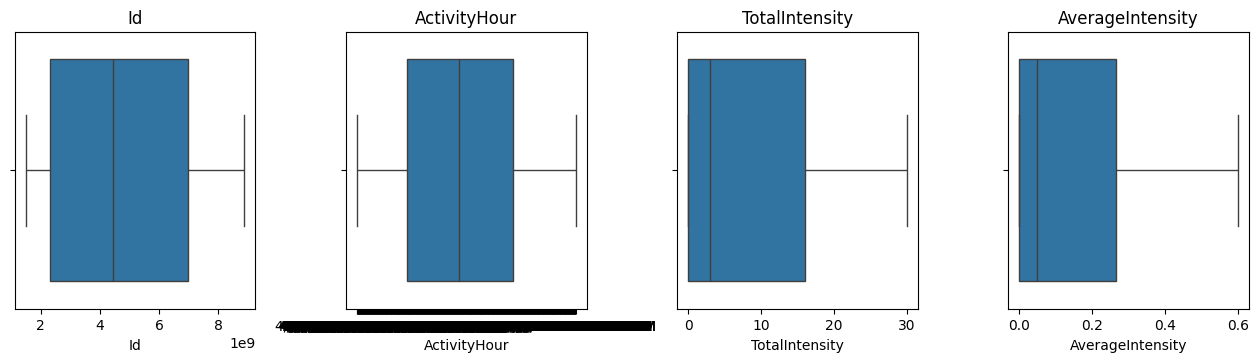

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(16, 10))

# Iterate through each column in the DataFrame
for column in dfHourlyIntensity.columns:
    # Create a box plot for each feature
    plt.subplot(3, 5, dfHourlyIntensity.columns.get_loc(column) + 1)  # Adjust the subplot grid as needed
    sns.boxplot(x=dfHourlyIntensity[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
# df_daily_activity is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/hourlyIntensities_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
dfHourlyIntensity.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/hourlyIntensities_merged_Filtered.csv
